<a href="https://colab.research.google.com/github/Shindora/Learn-Deep/blob/master/lesson1_Image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai import *
from fastai.vision import *

In [2]:
help(untar_data)

Help on function untar_data in module fastai.datasets:

untar_data(url:str, fname:Union[pathlib.Path, str]=None, dest:Union[pathlib.Path, str]=None, data=True, force_download=False) -> pathlib.Path
    Download `url` to `fname` if `dest` doesn't exist, and un-tgz to folder `dest`.



In [3]:
path=untar_data(URLs.PETS);path

PosixPath('/root/.fastai/data/oxford-iiit-pet')

In [4]:
path.ls()

[PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images')]

In [0]:
path_anno=path/'annotations'
path_img=path/'images'

In [6]:
fnames=get_image_files(path_img)
fnames[:5]

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Ragdoll_166.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Bengal_159.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/english_setter_187.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Ragdoll_234.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/saint_bernard_12.jpg')]

In [0]:
np.random.seed(2)
pat=r'/([^/]+)_\d+.jpg$'

In [8]:
data=ImageDataBunch.from_name_re(path_img,fnames,pat,ds_tfms=get_transforms(),size=224)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Ragdoll,Bengal,english_setter,saint_bernard,chihuahua
Path: /root/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
British_Shorthair,miniature_pinscher,english_cocker_spaniel,american_bulldog,Russian_Blue
Path: /root/.fastai/data/oxford-iiit-pet/images;

Test: None

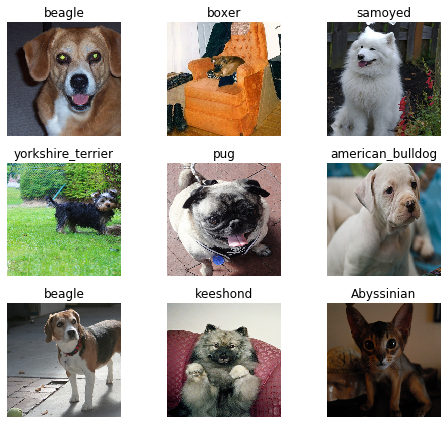

In [9]:
data.show_batch(rows=3,figsize=(7,6))

In [10]:
print(data.classes)
print(len(data.classes));data.c

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']
37


37

In [11]:
learn=create_cnn(data,models.resnet34,metrics=error_rate)

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


In [12]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.341371,0.380450,0.123816,01:22
1,0.635012,0.316908,0.099459,01:21
2,0.382213,0.278280,0.082544,01:22
3,0.292750,0.257587,0.075101,01:21


In [0]:
learn.save('/content/drive/My Drive/fastai/stage-1')

In [14]:
interp=ClassificationInterpretation.from_learner(learn)

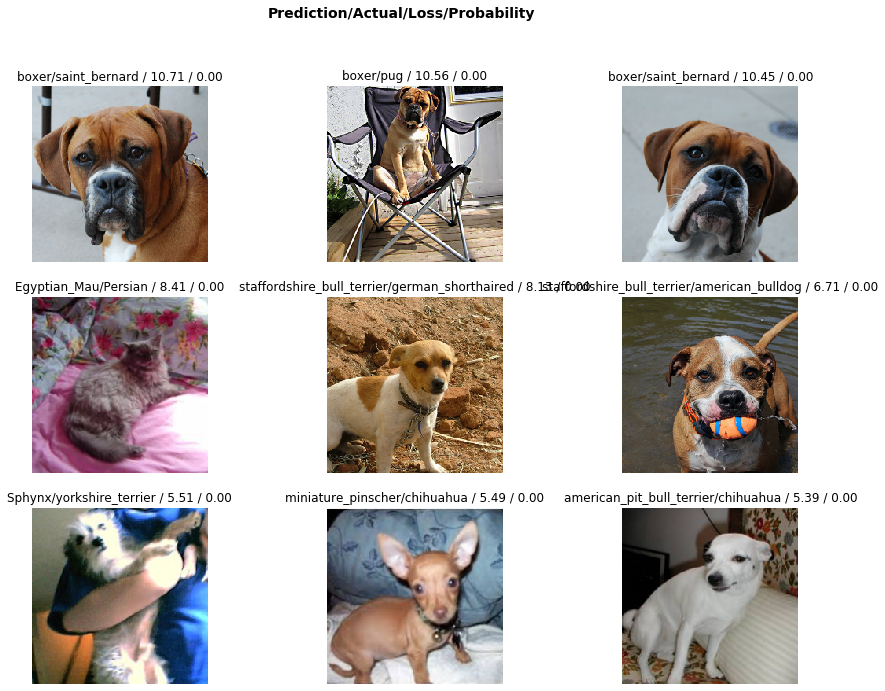

In [15]:
interp.plot_top_losses(9,figsize=(15,11))

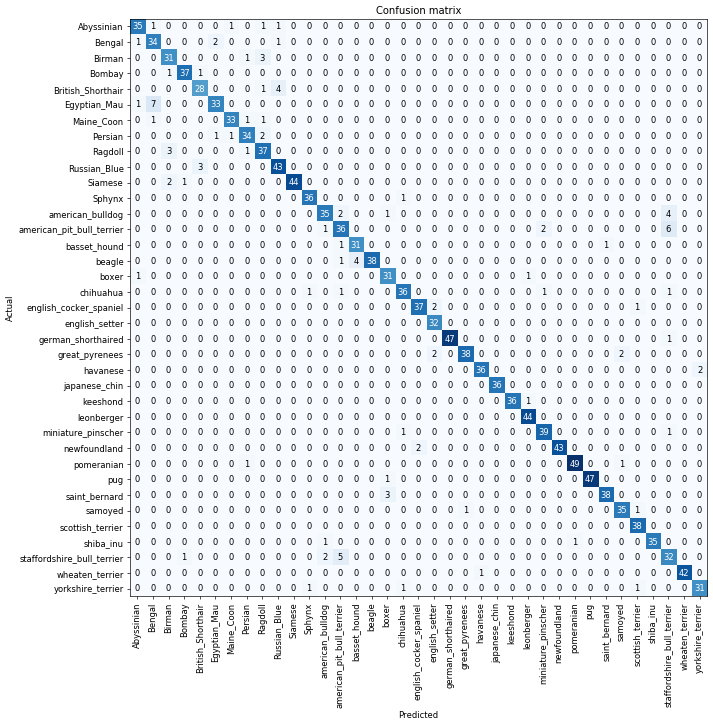

In [16]:
interp.plot_confusion_matrix(figsize=(12,12),dpi=60)

In [17]:
interp.most_confused(min_val=2)

[('Egyptian_Mau', 'Bengal', 7),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 6),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 5),
 ('British_Shorthair', 'Russian_Blue', 4),
 ('american_bulldog', 'staffordshire_bull_terrier', 4),
 ('beagle', 'basset_hound', 4),
 ('Birman', 'Ragdoll', 3),
 ('Ragdoll', 'Birman', 3),
 ('Russian_Blue', 'British_Shorthair', 3),
 ('saint_bernard', 'boxer', 3),
 ('Bengal', 'Egyptian_Mau', 2),
 ('Persian', 'Ragdoll', 2),
 ('Siamese', 'Birman', 2),
 ('american_bulldog', 'american_pit_bull_terrier', 2),
 ('american_pit_bull_terrier', 'miniature_pinscher', 2),
 ('english_cocker_spaniel', 'english_setter', 2),
 ('great_pyrenees', 'english_setter', 2),
 ('great_pyrenees', 'samoyed', 2),
 ('havanese', 'yorkshire_terrier', 2),
 ('newfoundland', 'english_cocker_spaniel', 2),
 ('staffordshire_bull_terrier', 'american_bulldog', 2)]

**Unfreezing**


In [0]:
learn.unfreeze()

In [19]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.706326,0.473459,0.140731,01:23


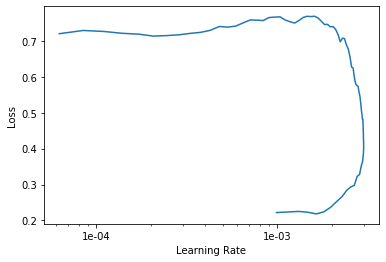

In [20]:
learn.recorder.plot()

In [21]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.379627,0.360733,0.106901,01:23
1,0.320790,0.344306,0.104871,01:24


In [0]:
learn.save('/content/drive/My Drive/fastai/stage-1.5')